In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df=pd.read_csv('Stats.csv')

In [3]:
df

,ID,mz,RT_median,MS1_count,MS2_triggered,Ion Type,Intensity_IROA_LTRS_OM_IDA_4,Intensity_IROA_LTRS_OM_IDA_5,Intensity_IROA_LTRS_OM_IDA_6,Area_IROA_LTRS_OM_IDA_4,...,Width_at_5%_IROA_LTRS_OM_IDA_5,Width_at_5%_IROA_LTRS_OM_IDA_6,RT_min:RT_max_IROA_LTRS_OM_IDA_4,RT_min:RT_max_IROA_LTRS_OM_IDA_5,RT_min:RT_max_IROA_LTRS_OM_IDA_6,No_MS2_triggered_IROA_LTRS_OM_IDA_4,No_MS2_triggered_IROA_LTRS_OM_IDA_5,No_MS2_triggered_IROA_LTRS_OM_IDA_6,MS2_Fragments,MS2_Intensities
0,5226,55.020,14.99,3,No,Probable Principal Ion,351.99,374.29,458.00,2847.443477,...,1.93,0.98,13.64:15.6,13.34:15.73,13.53:15.66,0,0,0,NIL,NIL
1,6490,57.035,16.55,1,No,Probable Principal Ion,0.00,198.16,0.00,0.000000,...,0.30,0.00,NIL,16.42:16.78,NIL,0,0,0,NIL,NIL
2,7413,57.036,17.47,3,No,Probable Principal Ion,1078.57,1010.34,1469.14,4928.241480,...,0.71,0.87,17.32:18.37,17.32:18.87,16.35:18.39,0,0,0,NIL,NIL
3,4038,57.976,12.24,1,No,ISF of ID 4037,0.00,0.00,67.12,0.000000,...,0.00,0.25,NIL,NIL,12.06:12.45,0,0,0,NIL,NIL
4,5632,60.131,15.40,1,No,Probable Principal Ion,0.00,0.00,174.92,0.000000,...,0.00,0.33,NIL,NIL,15.25:15.66,0,0,0,NIL,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10508,5393,981.142,15.16,1,No,Probable Principal Ion,0.00,0.00,990.35,0.000000,...,0.00,0.27,NIL,NIL,15.06:15.45,0,0,0,NIL,NIL
10509,9138,981.785,19.12,2,Yes,Probable Principal Ion,0.00,3351.26,4616.60,0.000000,...,0.34,0.40,NIL,19.01:19.39,18.83:19.31,0,0,2,339.202:340.203:981.647:981.778,100.0:1.26:2.1:9.35
10510,5542,982.140,15.33,1,No,Probable Principal Ion,0.00,1771.18,0.00,0.000000,...,0.35,0.00,NIL,15.03:15.44,NIL,0,0,0,NIL,NIL
10511,9088,982.790,19.06,1,No,Probable Principal Ion,0.00,0.00,2364.70,0.000000,...,0.00,0.50,NIL,NIL,18.85:19.45,0,0,0,NIL,NIL


In [4]:
df.columns

Index(['ID', 'mz', 'RT_median', 'MS1_count', 'MS2_triggered', 'Ion Type',
       'Intensity_IROA_LTRS_OM_IDA_4', 'Intensity_IROA_LTRS_OM_IDA_5',
       'Intensity_IROA_LTRS_OM_IDA_6', 'Area_IROA_LTRS_OM_IDA_4',
       'Area_IROA_LTRS_OM_IDA_5', 'Area_IROA_LTRS_OM_IDA_6', 'Average_Area',
       'Standard_deviation_Area', 'Width_at_50%_IROA_LTRS_OM_IDA_4',
       'Width_at_50%_IROA_LTRS_OM_IDA_5', 'Width_at_50%_IROA_LTRS_OM_IDA_6',
       'Width_at_5%_IROA_LTRS_OM_IDA_4', 'Width_at_5%_IROA_LTRS_OM_IDA_5',
       'Width_at_5%_IROA_LTRS_OM_IDA_6', 'RT_min:RT_max_IROA_LTRS_OM_IDA_4',
       'RT_min:RT_max_IROA_LTRS_OM_IDA_5', 'RT_min:RT_max_IROA_LTRS_OM_IDA_6',
       'No_MS2_triggered_IROA_LTRS_OM_IDA_4',
       'No_MS2_triggered_IROA_LTRS_OM_IDA_5',
       'No_MS2_triggered_IROA_LTRS_OM_IDA_6', 'MS2_Fragments',
       'MS2_Intensities'],
      dtype='object')

In [5]:
df = df[['ID', 'mz', 'RT_median','Intensity_IROA_LTRS_OM_IDA_4', 'Intensity_IROA_LTRS_OM_IDA_5',
       'Intensity_IROA_LTRS_OM_IDA_6']]

In [6]:
df

,ID,mz,RT_median,Intensity_IROA_LTRS_OM_IDA_4,Intensity_IROA_LTRS_OM_IDA_5,Intensity_IROA_LTRS_OM_IDA_6
0,5226,55.020,14.99,351.99,374.29,458.00
1,6490,57.035,16.55,0.00,198.16,0.00
2,7413,57.036,17.47,1078.57,1010.34,1469.14
3,4038,57.976,12.24,0.00,0.00,67.12
4,5632,60.131,15.40,0.00,0.00,174.92
...,...,...,...,...,...,...
10508,5393,981.142,15.16,0.00,0.00,990.35
10509,9138,981.785,19.12,0.00,3351.26,4616.60
10510,5542,982.140,15.33,0.00,1771.18,0.00
10511,9088,982.790,19.06,0.00,0.00,2364.70


In [7]:
df['y'] = df['Intensity_IROA_LTRS_OM_IDA_4']+df['Intensity_IROA_LTRS_OM_IDA_5']+df['Intensity_IROA_LTRS_OM_IDA_6']

<ipython-input-7-9139fc4c66cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['Intensity_IROA_LTRS_OM_IDA_4']+df['Intensity_IROA_LTRS_OM_IDA_5']+df['Intensity_IROA_LTRS_OM_IDA_6']


In [8]:
for i in range(0,10512):
    if (df['Intensity_IROA_LTRS_OM_IDA_4'][i]!=0 and df['Intensity_IROA_LTRS_OM_IDA_5'][i]!=0) or (df['Intensity_IROA_LTRS_OM_IDA_5'][i]!=0 and df['Intensity_IROA_LTRS_OM_IDA_6'][i]!=0) or (df['Intensity_IROA_LTRS_OM_IDA_4'][i]!=0 and df['Intensity_IROA_LTRS_OM_IDA_6'][i]!=0): 
        df['y'][i] = df['y'][i]/3

<ipython-input-8-6c9ef721e5a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][i] = df['y'][i]/3
C:\Users\Ayushi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df['y']

0         394.760000
1         198.160000
2        1186.016667
3          67.120000
4         174.920000
            ...     
10508     990.350000
10509    2655.953333
10510    1771.180000
10511    2364.700000
10512    1328.420000
Name: y, Length: 10513, dtype: float64

In [10]:
check = []
for i in range(10513):
    check.append(1)

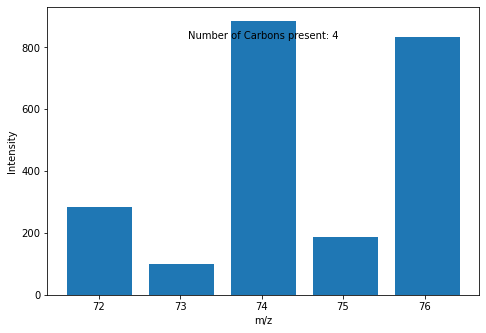

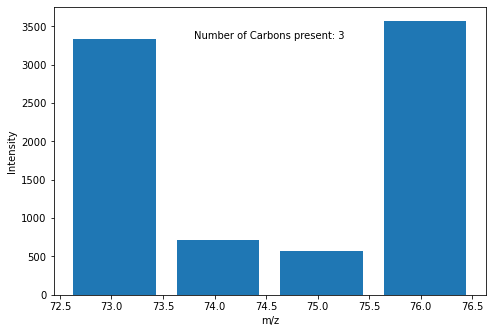

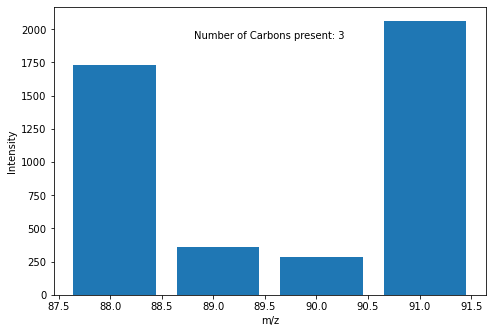

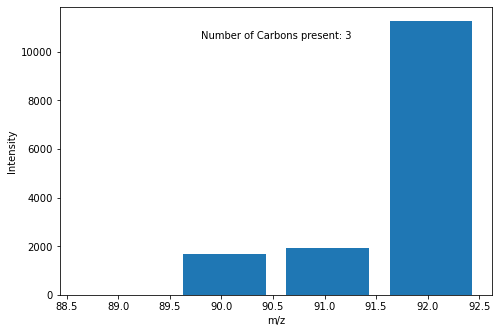

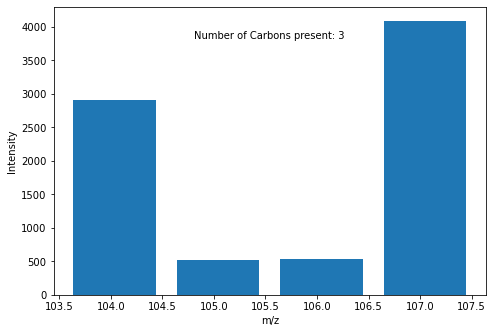

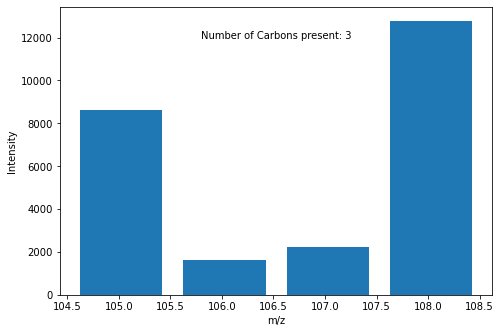

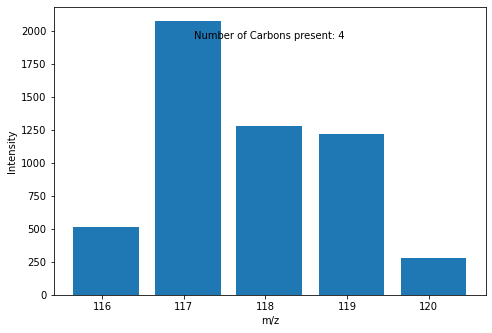

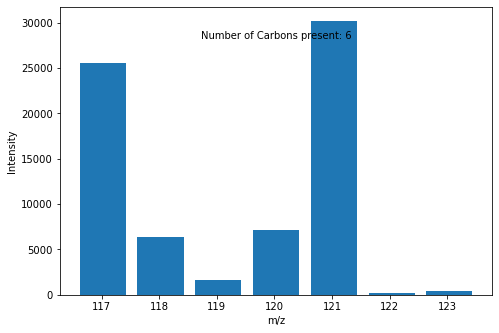

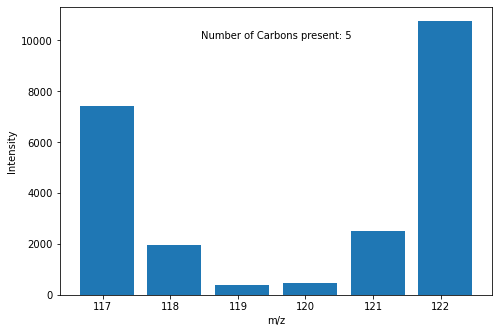

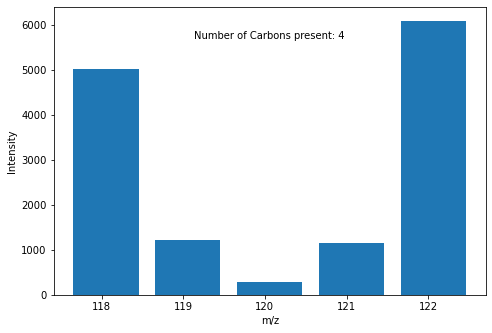

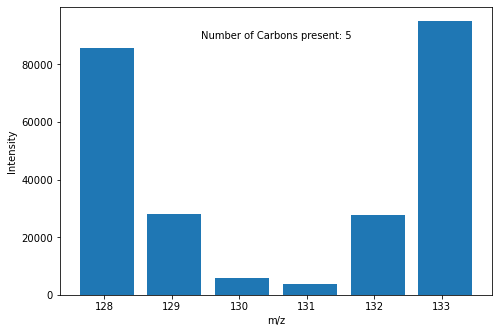

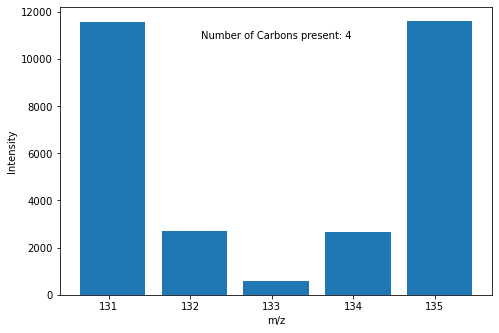

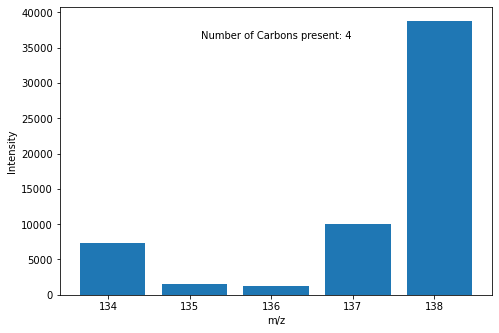

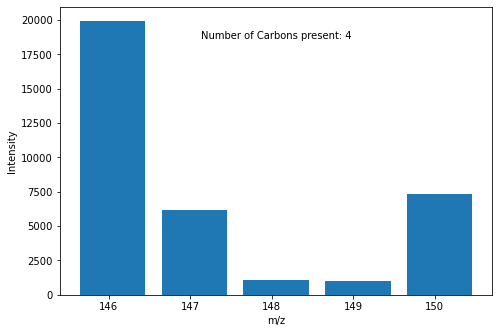

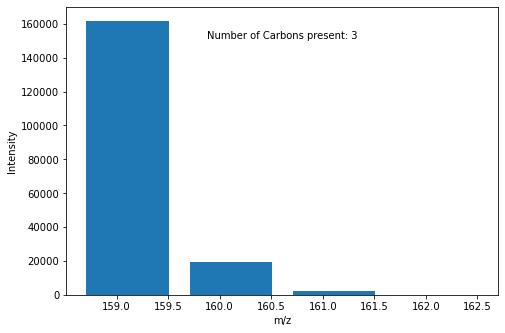

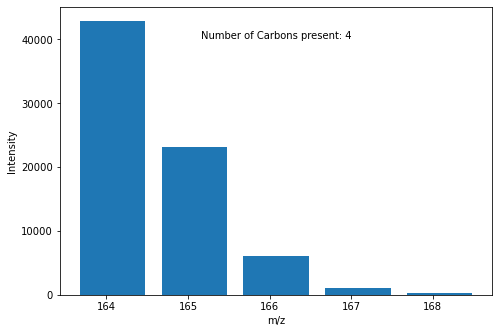

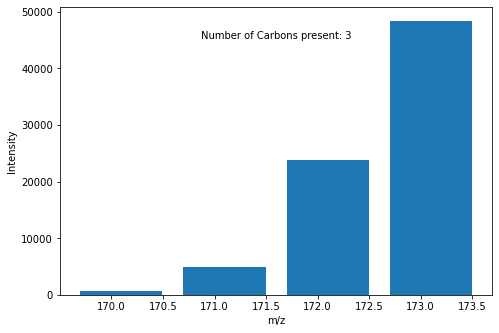

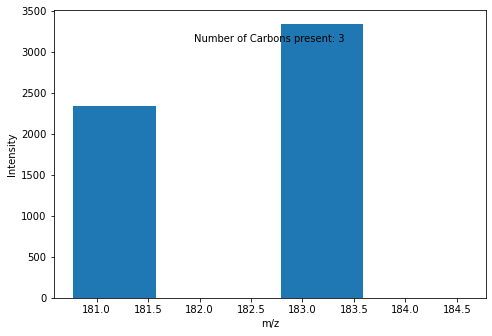

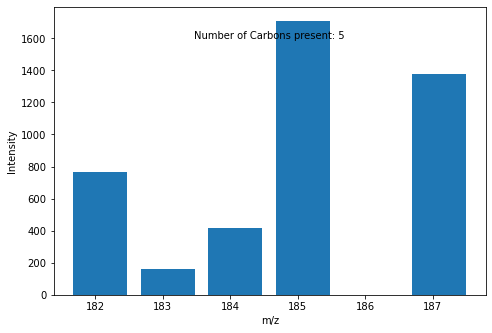

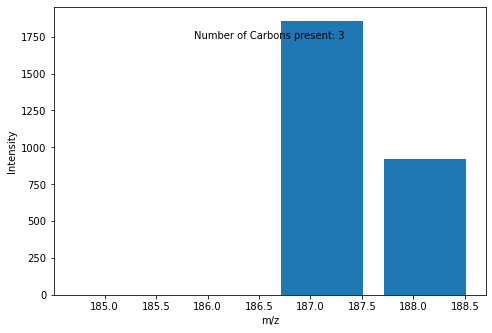

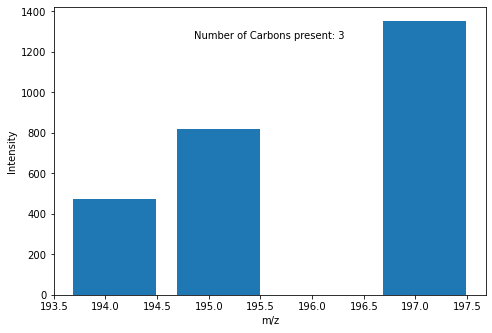

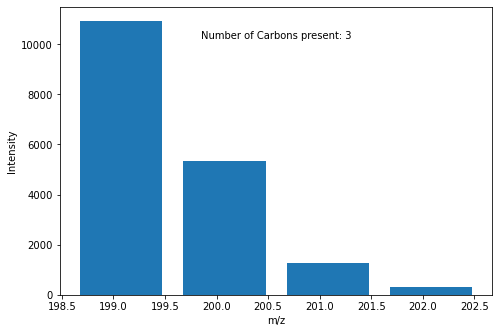

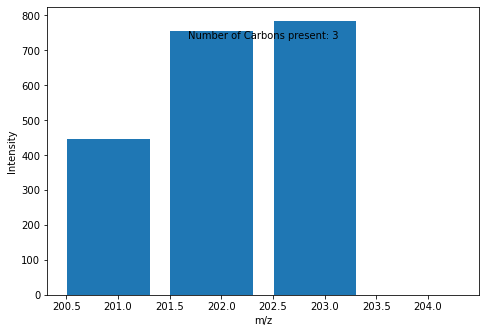

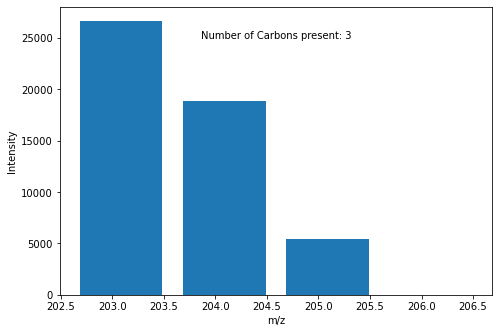

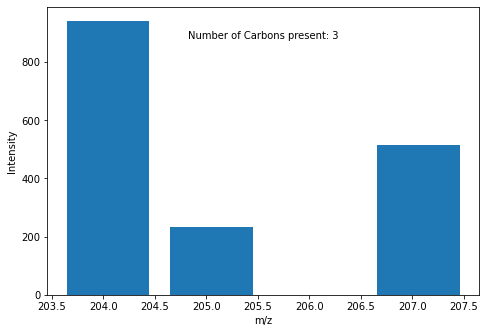

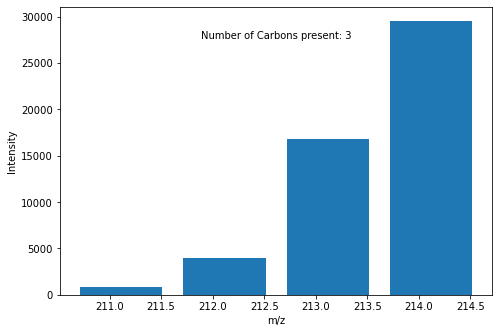

In [ ]:
pp = PdfPages('Save multiple plots as PDF.pdf')
rt_tol = 0.05
count = 0
for i in range(0,10511):
    n=1;
    mz=[]
    y=[]
    if check[i]:
        for j in range(i+1,10512):
            if (n*1.003-0.01<= abs(df['mz'][i]-df['mz'][j]) <=n*1.003+0.01) and (abs(df['RT_median'][i]-df['RT_median'][j])<rt_tol):
                check[j] = 0;
                n=n+1
                mz.append(df['mz'][j])
                y.append(df['Intensity_IROA_LTRS_OM_IDA_4'][j])
                t = math.floor((df['mz'][i]-2.014)/14.014)
                if(df['mz'][j]>t+df['mz'][i]):
                    break;
        if(n>3):        
            mz.insert(0,df['mz'][i])
            y.insert(0,df['Intensity_IROA_LTRS_OM_IDA_4'][i])
            count = count+1;
            fig = plt.figure()
            ax = fig.add_axes([0,0,1,1])
            ax.bar(mz,y)
            plt.xlabel('m/z')
            plt.ylabel('Intensity')
            plt.text(0.5, 0.9, "Number of Carbons present: {n}".format(n=n-1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            pp.savefig(fig, dpi=300, bbox_inches='tight')  
            plt.show()
pp.close()

In [18]:
count

0